# Dataset generation for Machine Learning

### Workflow
- Dataset overlap of EV and human proteome datasets
- EV annotation of featur datasets
- Removal of low count proteins (≤2 occurrences) 
- Generation of final feature datasets for machine learning

### Created datasets
- training_data_no_filter.csv
- training_data_MS_filter.csv
- training_data_MS_iso_filter.csv
- EV_proteins.txt

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from matplotlib_venn import venn2

import warnings
warnings.filterwarnings("ignore")

## Define paths

In [2]:
Data_path = os.path.dirname(os.getcwd()) + '/Data'

## Import datasets

### Curated EV datasets

In [3]:
EV_all = pd.read_csv(Data_path + '/curated/VPEC_all.csv')
EV_iso_filter = pd.read_csv(Data_path + '/curated/VP_Isolation_filter.csv')

In [4]:
EV_proteins = set(EV_all["Uniprot"])
EV_proteins_iso_filter = set(EV_iso_filter["Uniprot"])

### Feature datasets

In [5]:
features_all = pd.read_csv(Data_path + '/curated/features_human_proteome.csv' , sep=',', engine='python')
features_MS_filter = pd.read_csv(Data_path + '/curated/features_human_proteome_MS_filter.csv' , sep=',', engine='python')

In [6]:
human_proteome = set(features_all["id"])
human_proteome_MS_filter = set(features_MS_filter["id"])

## Data overlap

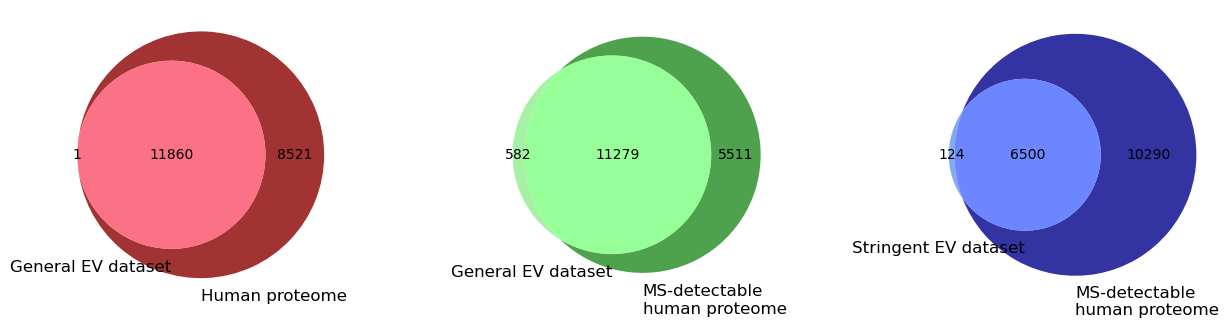

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5)

venn2([EV_proteins, human_proteome], ["General EV dataset", "Human proteome"], set_colors=("palevioletred", "darkred"), 
    alpha=0.8, ax=axs[0])
venn2([EV_proteins, human_proteome_MS_filter], ["General EV dataset", "MS-detectable\nhuman proteome"], 
    set_colors=("lightgreen", "forestgreen"), alpha=0.8, ax=axs[1])
venn2([EV_proteins_iso_filter, human_proteome_MS_filter], ["Stringent EV dataset", "MS-detectable\nhuman proteome"], 
    set_colors=("cornflowerblue", "darkblue"), alpha=0.8, ax=axs[2])

plt.show()

## EV annotation of datasets

In [8]:
# annotate proteins in EV list as EV proteins, missing proteins as non-EV proteins in human proteome
df_no_filter = features_all.copy()
df_no_filter['EV'] = np.where(features_all['id'].isin(EV_proteins), 1, 0)
df_MS_filter = features_MS_filter.copy()
df_MS_filter['EV'] = np.where(features_MS_filter['id'].isin(EV_proteins), 1, 0)
df_MS_iso_filter = features_MS_filter.copy()
df_MS_iso_filter['EV'] = np.where(features_MS_filter['id'].isin(EV_proteins_iso_filter), 1, 0)

In [9]:
print("Before removal of ambiguous proteins")
print("Unfiltered dataset")
print("\tEV proteins:", (df_no_filter["EV"] == 1).sum())
print("\tnon-EV proteins:", (df_no_filter["EV"] == 0).sum())
print("MS filtered dataset")
print("\tEV proteins:", (df_MS_filter["EV"] == 1).sum())
print("\tnon-EV proteins:", (df_MS_filter["EV"] == 0).sum())
print("Isolation workflow and MS filtered dataset") 
print("\tEV proteins:", (df_MS_iso_filter["EV"] == 1).sum())
print("\tnon-EV proteins:", (df_MS_iso_filter["EV"] == 0).sum())

Before removal of ambiguous proteins
Unfiltered dataset
	EV proteins: 11860
	non-EV proteins: 8521
MS filtered dataset
	EV proteins: 11279
	non-EV proteins: 5511
Isolation workflow and MS filtered dataset
	EV proteins: 6500
	non-EV proteins: 10290


## Removal of low count proteins from datasets

In [10]:
# set maximum number of occurrences that should be removed (inclusive)
low_count = 2
EV_all_low_count = EV_all[EV_all['OCCURRENCES'] <= low_count].copy()
EV_iso_filter_low_count = EV_iso_filter[EV_iso_filter['OCCURRENCES'] <= low_count].copy()

In [11]:
# unfiltered dataset
keep = (df_no_filter['id'].isin(EV_all_low_count["Uniprot"]) == False)
df_no_filter_keep = df_no_filter[keep]

print("Number of low count proteins:", (keep == False).sum(), "(REMOVED)")
print("Number of kept proteins:", len(df_no_filter_keep))
print("Number of EV associated proteins:", (df_no_filter_keep["EV"] == 1).sum())
print("Number of non-EV associated proteins:", (df_no_filter_keep["EV"] == 0).sum())

Number of low count proteins: 3452 (REMOVED)
Number of kept proteins: 16929
Number of EV associated proteins: 8408
Number of non-EV associated proteins: 8521


In [12]:
# MS filtered dataset
keep = (df_MS_filter['id'].isin(EV_all_low_count["Uniprot"]) == False)
df_MS_filter_keep = df_MS_filter[keep]

print("Number of low count proteins:", (keep == False).sum(), "(REMOVED)")
print("Number of kept proteins:", len(df_MS_filter_keep))
print("Number of EV associated proteins:", (df_MS_filter_keep["EV"] == 1).sum())
print("Number of non-EV associated proteins:", (df_MS_filter_keep["EV"] == 0).sum())

Number of low count proteins: 3081 (REMOVED)
Number of kept proteins: 13709
Number of EV associated proteins: 8198
Number of non-EV associated proteins: 5511


In [13]:
# Isolation workflow and MS filtered dataset
keep = (df_MS_iso_filter['id'].isin(EV_iso_filter_low_count["Uniprot"]) == False)
df_MS_iso_filter_keep = df_MS_iso_filter[keep]

print("Number of low count proteins:", (keep == False).sum(), "(REMOVED)")
print("Number of kept proteins:", len(df_MS_iso_filter_keep))
print("Number of EV associated proteins:", (df_MS_iso_filter_keep["EV"] == 1).sum())
print("Number of non-EV associated proteins:", (df_MS_iso_filter_keep["EV"] == 0).sum())

Number of low count proteins: 535 (REMOVED)
Number of kept proteins: 16255
Number of EV associated proteins: 5965
Number of non-EV associated proteins: 10290


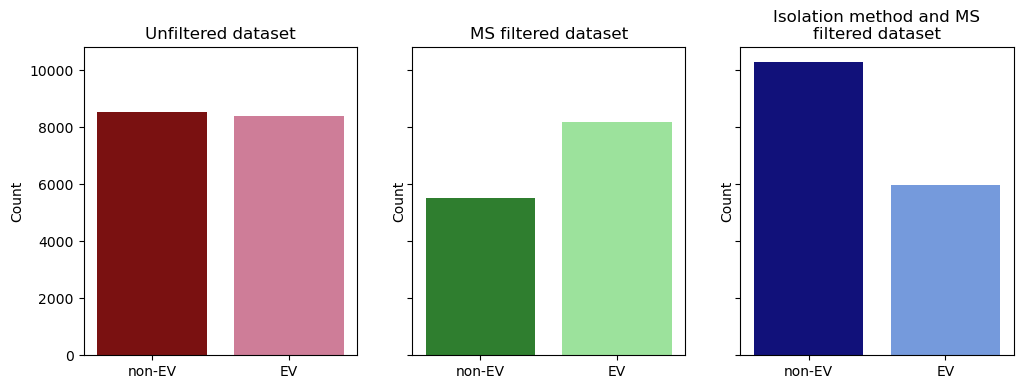

In [14]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))

sns.countplot(x="EV", data=df_no_filter_keep, palette=["darkred", "palevioletred"], ax=ax[0])
ax[0].set(title="Unfiltered dataset", xticklabels=["non-EV", "EV"], xlabel=None, ylabel="Count")
sns.countplot(x="EV", data=df_MS_filter_keep, palette=["forestgreen", "lightgreen"], ax=ax[1])
ax[1].set(title="MS filtered dataset", xticklabels=["non-EV", "EV"], xlabel=None, ylabel="Count")
sns.countplot(x="EV", data=df_MS_iso_filter_keep, palette=["darkblue", "cornflowerblue"], ax=ax[2])
ax[2].set(title="Isolation method and MS\nfiltered dataset", xticklabels=["non-EV", "EV"], xlabel=None, ylabel="Count")

plt.show()

# Save final feature data set

In [15]:
df_no_filter_keep.drop(columns=['fasta_sequence'], inplace=True) 
df_no_filter_keep.to_csv(Data_path + '/training/training_data_no_filter.csv', index=False)

df_MS_filter_keep.drop(columns=['fasta_sequence'], inplace=True) 
df_MS_filter_keep.to_csv(Data_path + '/training/training_data_MS_filter.csv', index=False)

df_MS_iso_filter_keep.drop(columns=['fasta_sequence'], inplace=True) 
df_MS_iso_filter_keep.to_csv(Data_path + '/training/training_data_MS_iso_filter.csv', index=False)

In [16]:
# save list of EV proteins
with open(Data_path + '/curated/EV_proteins.txt', 'w') as f:
    for i in df_MS_iso_filter_keep[df_MS_iso_filter_keep['EV'] == 1]['id']:
        f.write(i + '\n')